In [1]:
%matplotlib inline
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
quandl.ApiConfig.api_key = 'YOUR KEY HERE'
def get_data(code_list):
    all_data=[]
    for each_code in code_list: 
        ary=quandl.get(f'ZILLOW/{each_code}', returns='numpy')
#         all_data[each_code]=ary
        one_df=pd.DataFrame(ary)
        one_df=one_df.rename({'Value': each_code}, axis=1)#, columns=['Date', each_code])
        one_df=one_df.set_index('Date')
        all_data.append(one_df)
    df=pd.concat(all_data, axis=1)
    return df

In [3]:
df = get_data(['M9_MRPFAH', 'M9_MSPFAH', 'M9_MLPFAH', 'M9_MRPAH'])
df = df.rename(columns={"M9_MRPFAH": "Median Rent Price Per Sqft", 
                        "M9_MSPFAH": "Median Sold Price Per Sqft", 
                        "M9_MLPFAH": "Median List Price Per Sqft", 
                        "M9_MRPAH": "Median Rent Price"})
df.head()

,Median Rent Price Per Sqft,Median Sold Price Per Sqft,Median List Price Per Sqft,Median Rent Price
Date,,,,
1996-04-30,NaN,60.2980,NaN,NaN
1996-05-31,NaN,60.4000,NaN,NaN
1996-06-30,NaN,60.8483,NaN,NaN
1996-07-31,NaN,61.1081,NaN,NaN
1996-08-31,NaN,61.3230,NaN,NaN


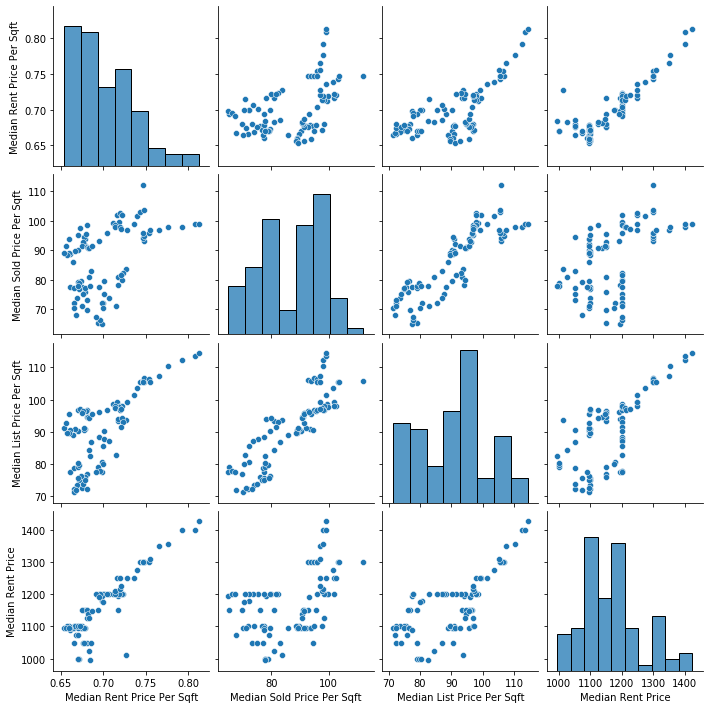

In [4]:
import seaborn as sns
drop_na_df=df.dropna()
sns.pairplot(drop_na_df)
drop_na_df
plt.savefig('PairPlot-Sqft.png')

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
model = LinearRegression()

X=drop_na_df.drop('Median Rent Price', axis=1)
Y=drop_na_df['Median Rent Price']

poly=PolynomialFeatures()
poly.fit(X)
transformed_X=poly.transform(X)

display(X.head())
display(Y.head())
model.fit(transformed_X, Y)
print(model)


,Median Rent Price Per Sqft,Median Sold Price Per Sqft,Median List Price Per Sqft
Date,,,
2010-01-31,0.727402,83.6435,93.546798
2010-02-28,0.716958,80.8857,93.266667
2010-03-31,0.716958,78.0938,93.991737
2010-04-30,0.722383,79.9646,94.437564
2010-05-31,0.722983,82.2230,93.065811


Date
2010-01-31    1012.5
2010-02-28    1150.0
2010-03-31    1195.0
2010-04-30    1200.0
2010-05-31    1200.0
Freq: M, Name: Median Rent Price, dtype: float64

LinearRegression()


In [6]:
model.score(transformed_X, Y) # R^2 value -> it measure how much of Y is being considered by X

0.8597821380608122

# In this pairplot, we compare Median Rent Price, Rent/Sqft, List/Sqft, and Sold/Sqft Prices. As you can see, Median Rent Price per Sqft does correlate well with Median Rent Price.